=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=

                                  ES335- Machine Learning (HAR-INSIGHT)

Creating the dataset for the project. The dataset is created by reading the data from
the Combined folder. The data is then split into training, testing, and validation sets. This split is supposed
to be used for all the modeling purposes.

=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=

In [1]:
# Library imports
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os

C:\Users\HP\AppData\Local\Temp\ipykernel_7092\755841982.py:4: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
# Constants
time = 10
offset = 100
folders = ["LAYING","SITTING","STANDING","WALKING","WALKING_DOWNSTAIRS","WALKING_UPSTAIRS"]
classes = {"WALKING":1,"WALKING_UPSTAIRS":2,"WALKING_DOWNSTAIRS":3,"SITTING":4,"STANDING":5,"LAYING":6}

In [3]:
combined_dir = os.path.join("Combined")

In [4]:
#=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-==-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=
                                                # Train Dataset
#=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-==-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=

In [5]:
X_train=[]
y_train=[]
dataset_dir = os.path.join(combined_dir,"Train")

In [6]:
for folder in folders:
    files = os.listdir(os.path.join(dataset_dir,folder))

    for file in files:

        df = pd.read_csv(os.path.join(dataset_dir,folder,file),sep=",",header=0)
        df = df[offset:offset+time*50]
        X_train.append(df.values)
        y_train.append(classes[folder])

In [7]:
X_train = np.array(X_train)
y_train = np.array(y_train)

In [8]:
#=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-==-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=
                                                # Test Dataset
#=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-==-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=

In [8]:
X_test=[]
y_test=[]
dataset_dir = os.path.join(combined_dir,"Test")

In [9]:
for folder in folders:
    files = os.listdir(os.path.join(dataset_dir,folder))
    for file in files:

        df = pd.read_csv(os.path.join(dataset_dir,folder,file),sep=",",header=0)
        df = df[offset:offset+time*50]
        X_test.append(df.values)
        y_test.append(classes[folder])

In [10]:
X_test = np.array(X_test)
y_test = np.array(y_test)

In [12]:
#=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-==-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=
                                                # Final Dataset
#=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-==-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=

USE THE BELOW GIVEN DATA FOR TRAINING, TESTING, AND VALIDATION purposes

In [11]:
# concatenate the training and testing data
X = np.concatenate((X_train,X_test))
y = np.concatenate((y_train,y_test))

In [12]:
# split the data into training,testing, and validation sets
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.4,random_state=4,stratify=y)
X_test,X_val,y_test,y_val = train_test_split(X_test,y_test,test_size=0.5,random_state=4,stratify=y_test)

In [13]:
print("Training data shape: ",X_train.shape)
print("Testing data shape: ",X_test.shape)
print("Validation data shape: ",X_val.shape)

Training data shape:  (108, 500, 3)
Testing data shape:  (36, 500, 3)
Validation data shape:  (36, 500, 3)


In [16]:
X_train

array([[[ 0.9736077 , -0.1844755 , -0.2821974 ],
        [ 0.9760866 , -0.1867793 , -0.2848794 ],
        [ 0.977865  , -0.191836  , -0.2891687 ],
        ...,
        [ 0.9779202 , -0.1834941 , -0.2829651 ],
        [ 0.9796224 , -0.1832831 , -0.279844  ],
        [ 0.9775468 , -0.1833646 , -0.2764387 ]],

       [[ 1.00564   , -0.1732591 , -0.2299191 ],
        [ 1.006267  , -0.1727248 , -0.2516695 ],
        [ 1.004331  , -0.1783138 , -0.2447012 ],
        ...,
        [ 0.9963187 , -0.165975  , -0.2166365 ],
        [ 0.998345  , -0.1662256 , -0.2176124 ],
        [ 1.00105   , -0.1642913 , -0.2210956 ]],

       [[ 0.784794  , -0.2597323 , -0.2317497 ],
        [ 0.8028195 , -0.2151319 , -0.2276441 ],
        [ 0.7250539 , -0.2064177 , -0.2095281 ],
        ...,
        [ 0.6540971 , -0.140727  , -0.2860766 ],
        [ 0.6268603 , -0.2748843 , -0.2455943 ],
        [ 0.6052588 , -0.3292142 , -0.1952567 ]],

       ...,

       [[ 1.013856  , -0.08463204, -0.1833906 ],
        [ 1

---

**Task 1: Visual Analysis of Activity Waveforms**

Plotting the waveform data for each activity class to identify differences and similarities between the activities. This visual analysis aims to provide insights into whether the model can effectively classify activities based on the observed data patterns.

In [18]:
df = pd.DataFrame(np.concatenate((X_train.reshape((-1, 3)), np.repeat(y_train, 500).reshape(-1,1)), axis = 1), columns = ["accx", "accy", "accz", "Label"])
df

,accx,accy,accz,Label
0,0.973608,-0.184475,-0.282197,5.0
1,0.976087,-0.186779,-0.284879,5.0
2,0.977865,-0.191836,-0.289169,5.0
3,0.979638,-0.191792,-0.291794,5.0
4,0.982244,-0.189156,-0.288260,5.0
...,...,...,...,...
53995,0.730058,-0.197915,-0.066743,2.0
53996,0.696212,-0.149662,-0.059822,2.0
53997,0.731536,-0.162198,-0.049890,2.0
53998,0.762215,-0.176539,-0.038009,2.0


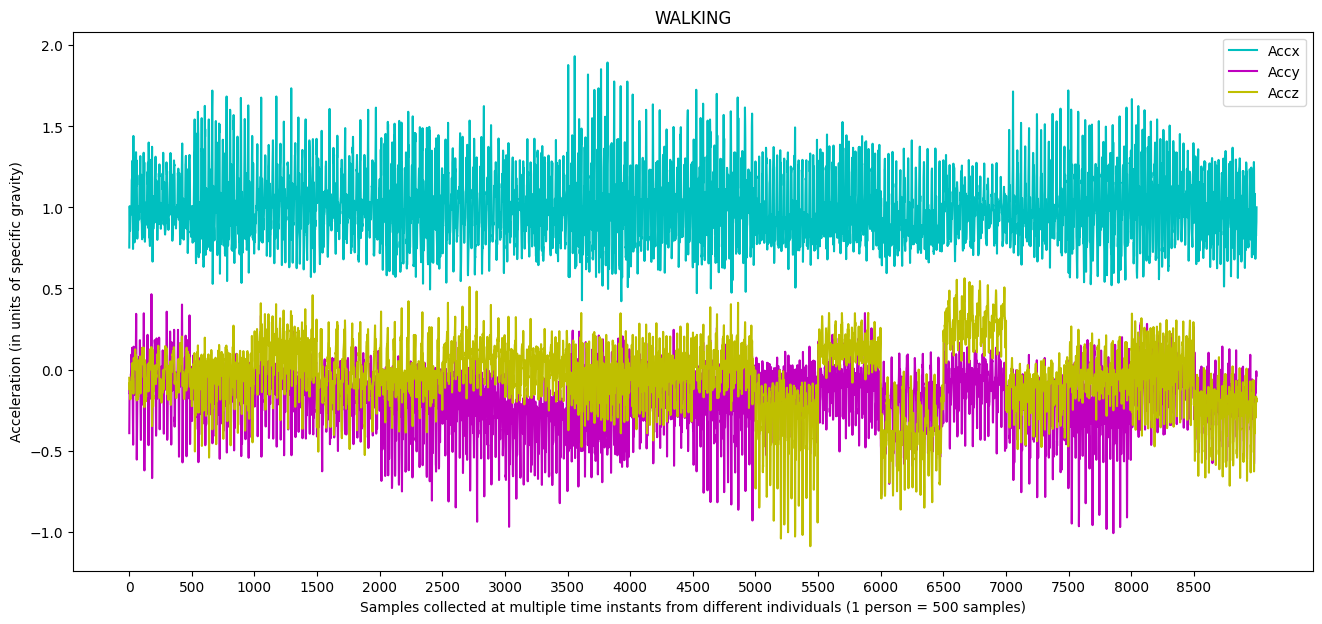

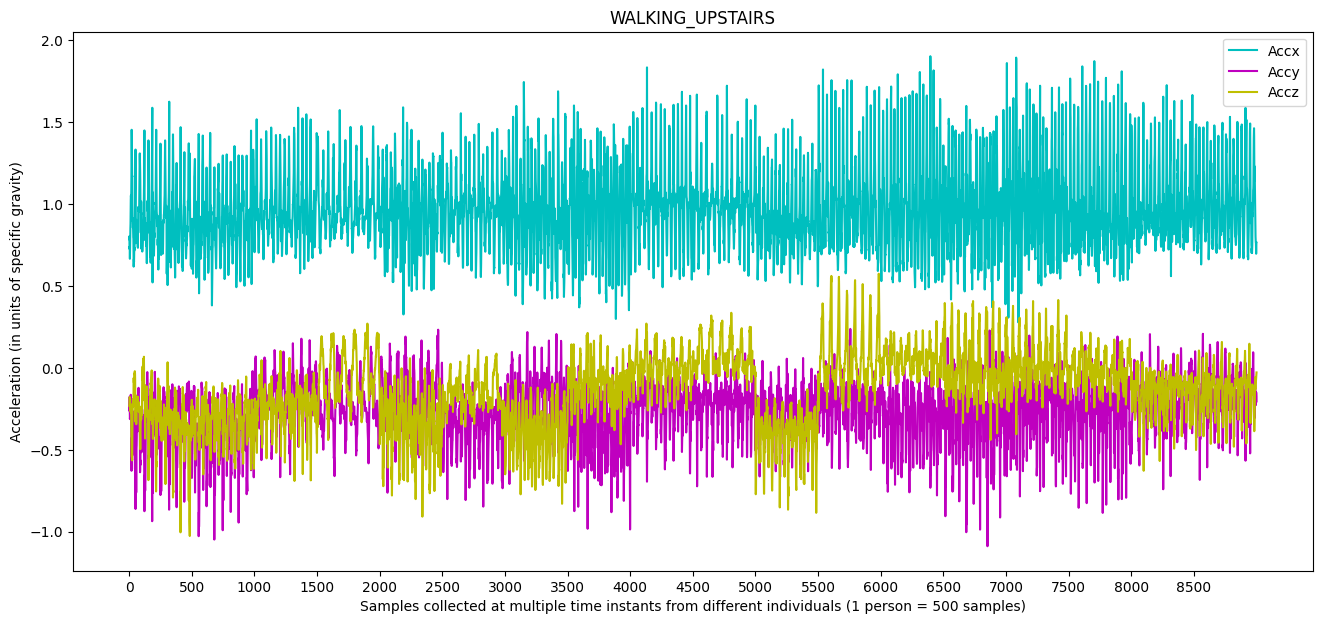

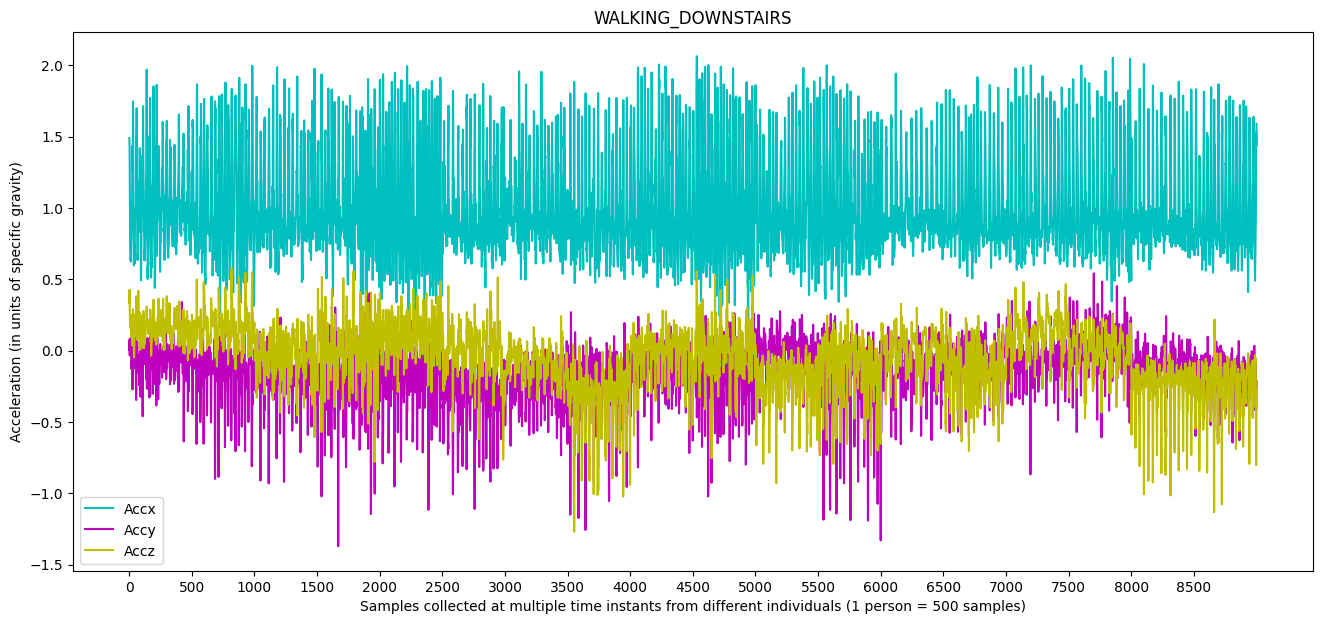

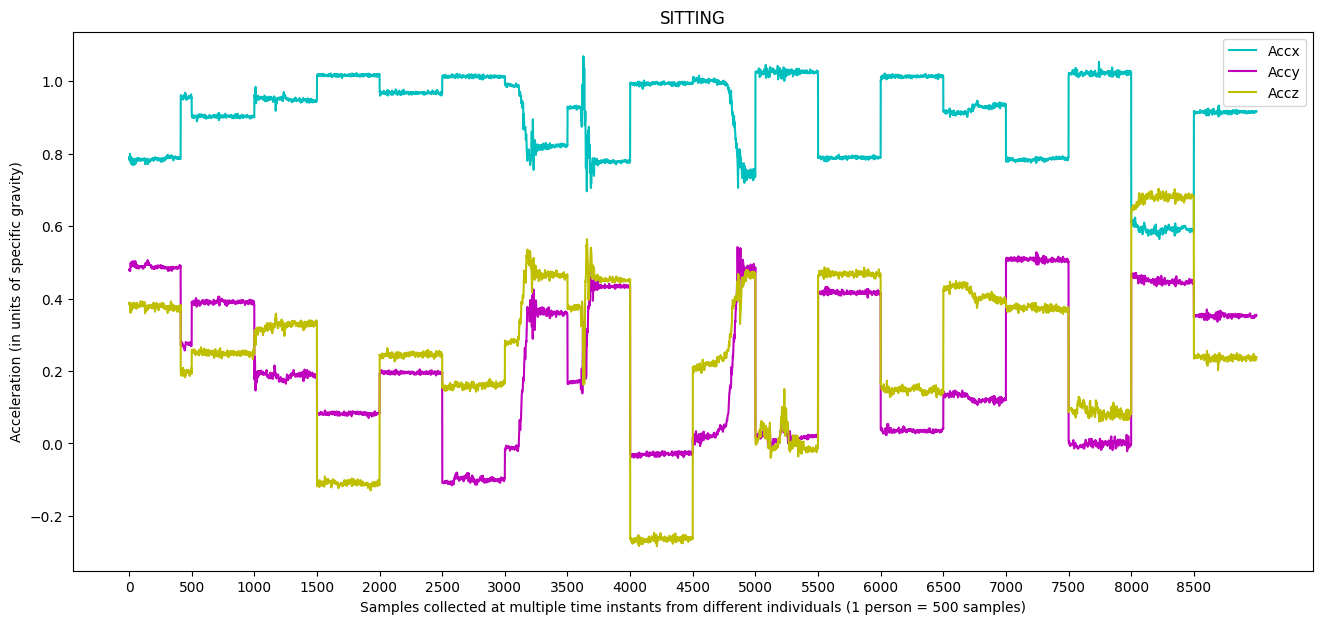

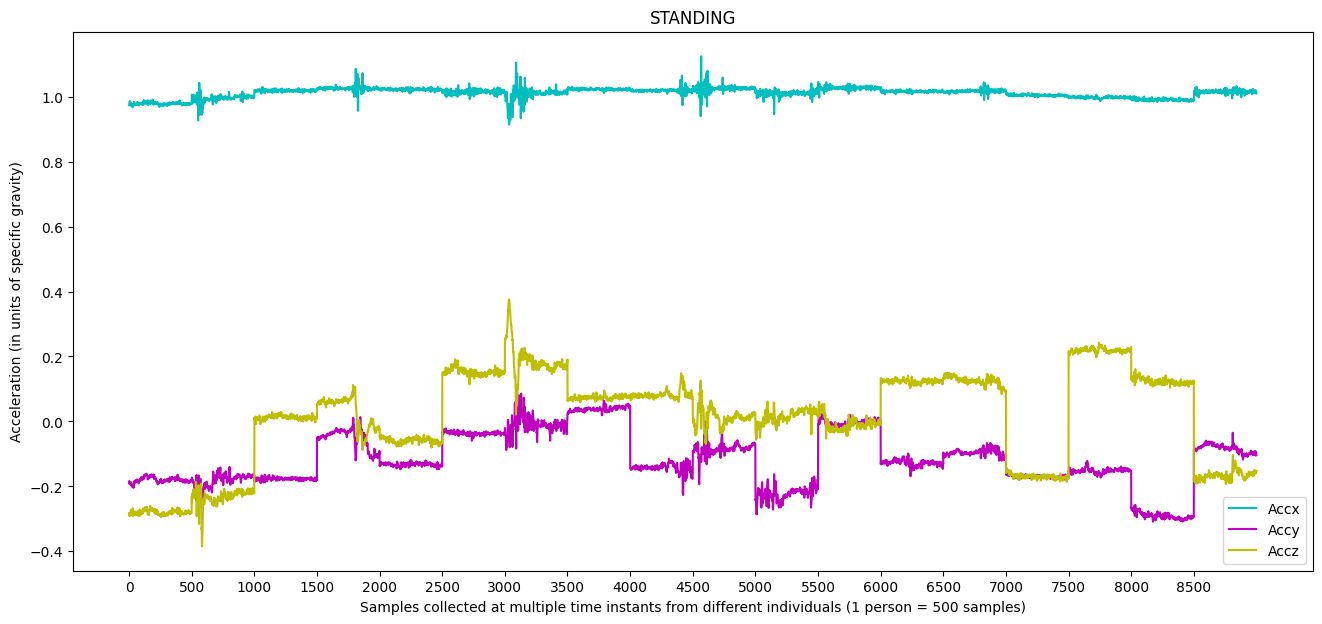

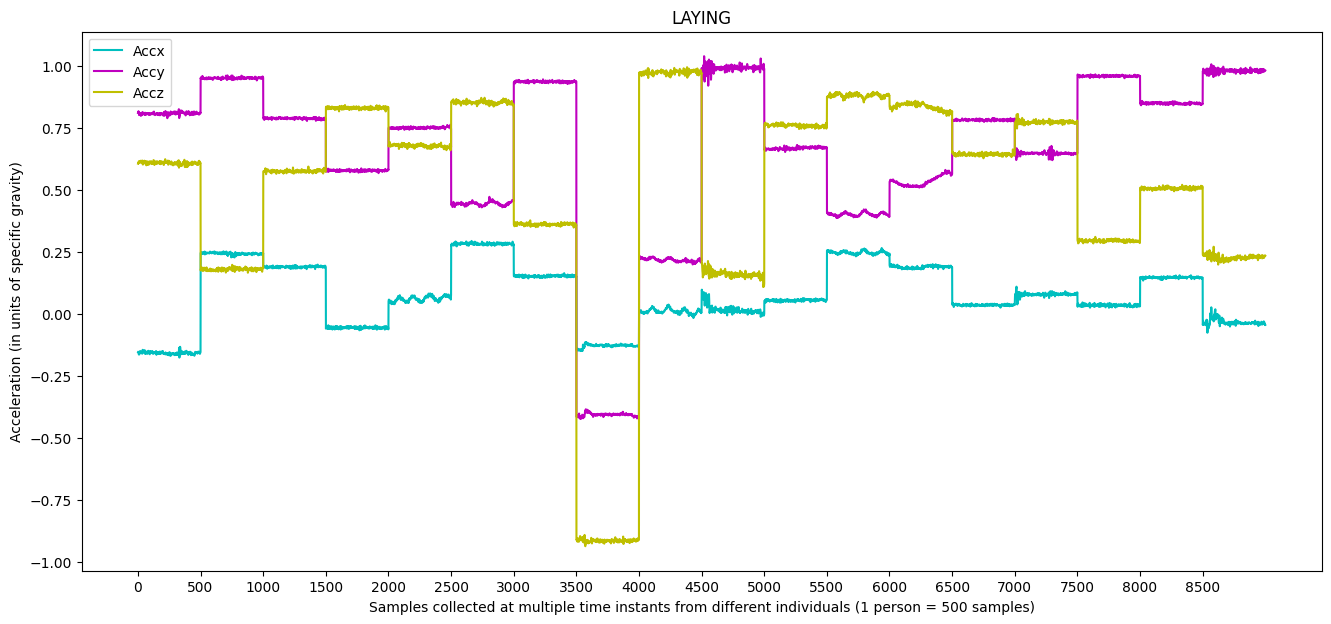

In [28]:
Movement = ["WALKING","WALKING_UPSTAIRS","WALKING_DOWNSTAIRS","SITTING","STANDING","LAYING"]
for i in range(1,7):
        plt.figure(figsize=(16,7))
        length = range(1,len(df[df['Label']==i])+1)   # have used our own series of x
        plt.plot(length,df[df['Label']==i]["accx"],color='c')
        plt.plot(length,df[df['Label']==i]["accy"],color='m')
        plt.plot(length,df[df['Label']==i]["accz"],color='y')
        plt.legend(['Accx','Accy','Accz'])
        plt.title(Movement[i-1])
        plt.xlabel("Samples collected at multiple time instants from different individuals (1 person = 500 samples)")
        plt.ylabel("Acceleration (in units of specific gravity)")
        plt.xticks(range(0, len(length), 500), range(0, len(length), 500))
        plt.show()


**Observation**: The data analysis reveals distinct patterns within the categories of standing, sitting, and laying, as well as among walking, walking upstairs, and walking downstairs. Specifically, there is a notable similarity in the acceleration profiles within each group. However, the two groups exhibit significant differences from each other, with walking-related activities (walking, walking upstairs, and walking downstairs) showing greater variation in acceleration compared to the more stable activities of standing, sitting, and laying.

---

**Task 2**<br>
Analysing that do we need a machine learning model to differentiate between static activities (laying, sitting, standing) and dynamic activities(walking, walking_downstairs, walking_upstairs)? <br>
Utilizing linear acceleration data (acc<sub>x</sub><sup>2</sup>+acc<sub>y</sub><sup>2</sup>+acc<sub>z</sub><sup>2</sup>) to differentiate between these activity types.

In [19]:
df = df.assign(Total_Acceration = (df.accx)**2 + (df.accy)**2 + (df.accz)**2 )
df

,accx,accy,accz,Label,Total_Acceration
0,0.973608,-0.184475,-0.282197,5.0,1.061579
1,0.976087,-0.186779,-0.284879,5.0,1.068788
2,0.977865,-0.191836,-0.289169,5.0,1.076640
3,0.979638,-0.191792,-0.291794,5.0,1.081619
4,0.982244,-0.189156,-0.288260,5.0,1.083677
...,...,...,...,...,...
53995,0.730058,-0.197915,-0.066743,2.0,0.576609
53996,0.696212,-0.149662,-0.059822,2.0,0.510688
53997,0.731536,-0.162198,-0.049890,2.0,0.563943
53998,0.762215,-0.176539,-0.038009,2.0,0.613582


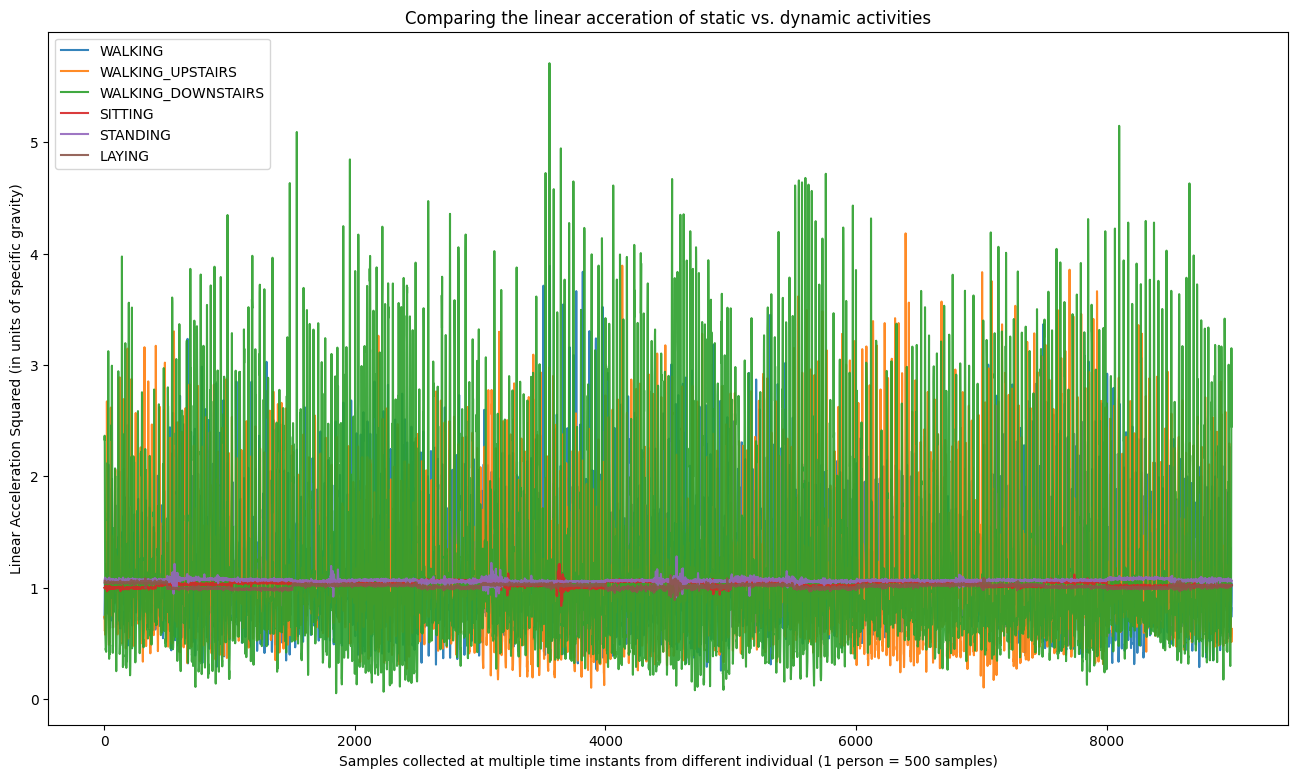

In [20]:
plt.figure(figsize=(16,9))
for i in range(1,7):
    length = range(1,len(df[df["Label"]==i])+1)
    plt.plot(length,df[df['Label']==i]["Total_Acceration"],alpha=0.9)
    plt.xlabel("Samples collected at multiple time instants from different individual (1 person = 500 samples)")
    plt.ylabel("Linear Acceleration Squared (in units of specific gravity)")
    plt.title("Comparing the linear acceration of static vs. dynamic activities")
    plt.legend(Movement)
plt.show()

**Observation**: From the graph obtained above, it is clear that static activities (sitting, standing and laying) have their linear acceleration squared values centered around `1.0` and dynamic activities (walking, walking upstairs and walking downstairs), ranging approximately from `0` to `3`. Dynamic activities show multiple spikes for all the samples.

Therefore, a machine learning model is **not required** to differentiate between static and dynamic activities.

*Just a few conditional statements would do the job!*

---

**Task 3**<br>
Train Decision Tree using trainset and report Accuracy and confusion matrix using testset.

Accuracy on test data: 72.22222222222221 %


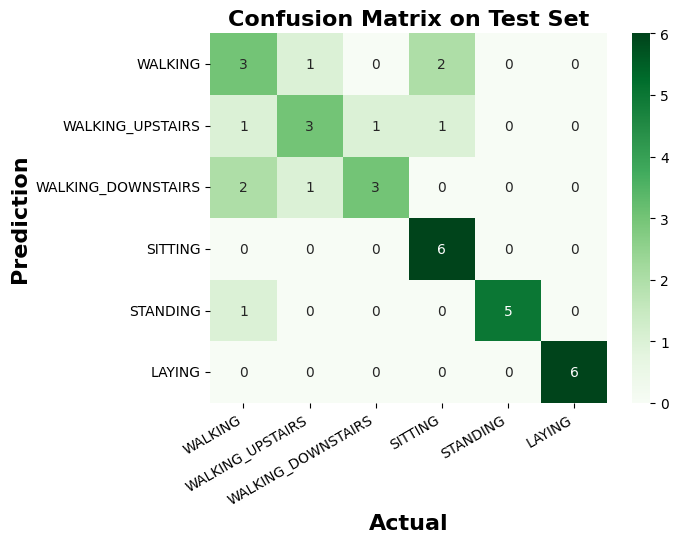

In [21]:
from sklearn.tree import DecisionTreeClassifier
import seaborn as sns
from sklearn import metrics
from sklearn.metrics import confusion_matrix

X_train = X_train.reshape(108, -1)
X_test = X_test.reshape(36,-1)

clf = DecisionTreeClassifier(random_state=154)
clf = clf.fit(X_train,y_train)

y_pred = clf.predict(X_test)
print("Accuracy on test data:",metrics.accuracy_score(y_test, y_pred)*100,"%")
cm = confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True,xticklabels=Movement,yticklabels=Movement,cmap="Greens")
# plt.xticks(rotation=40)
plt.ylabel("Prediction",fontweight='bold',fontsize=16)
plt.xlabel("Actual",fontweight='bold',fontsize=16)
plt.title("Confusion Matrix on Test Set",fontweight='bold',fontsize=16)
plt.xticks(rotation=30, ha="right")
plt.show()

---

**Task 4**<br>
Training Decision Tree with varrying depths (2-8) using trainset and report accuracy and confusion matrix using Test set. Observing the change of accuracy when the depth is increased.

Depth = 2
Accuracy on test data 44.44444444444444 %


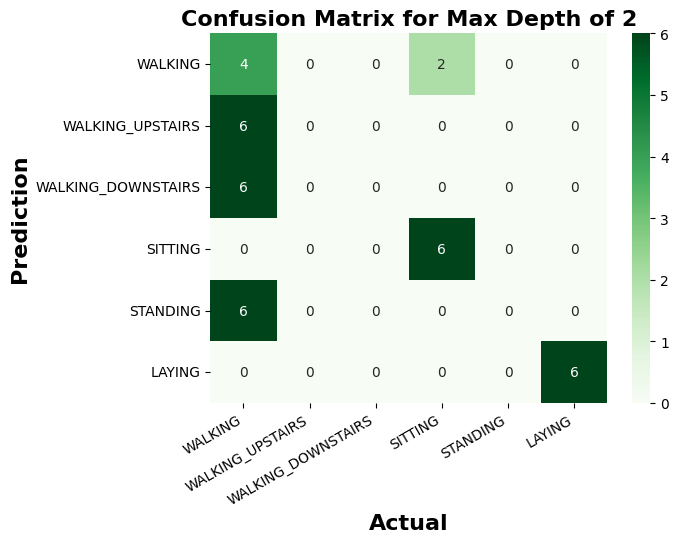

=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-==-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=


Depth = 3
Accuracy on test data 61.111111111111114 %


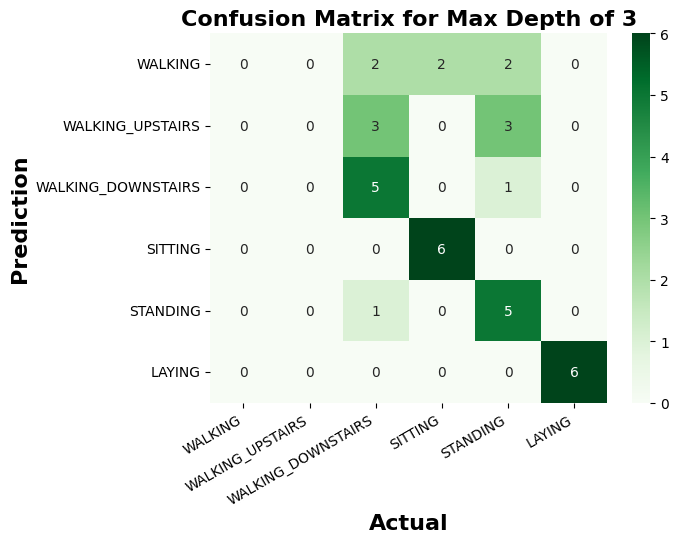

=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-==-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=


Depth = 4
Accuracy on test data 66.66666666666666 %


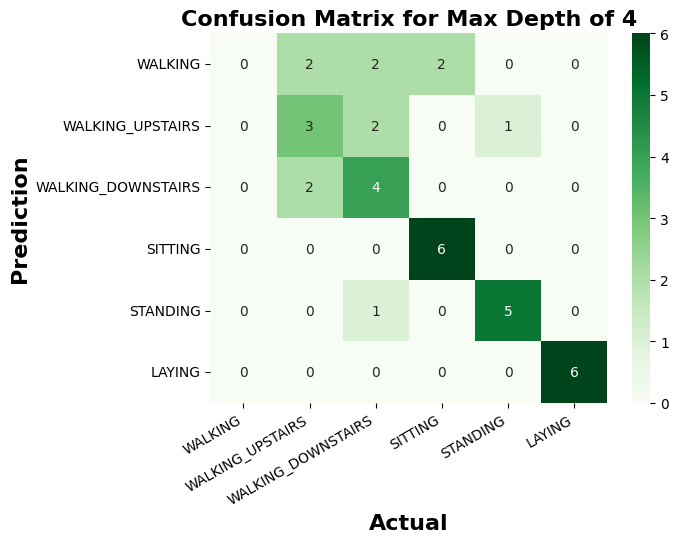

=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-==-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=


Depth = 5
Accuracy on test data 58.333333333333336 %


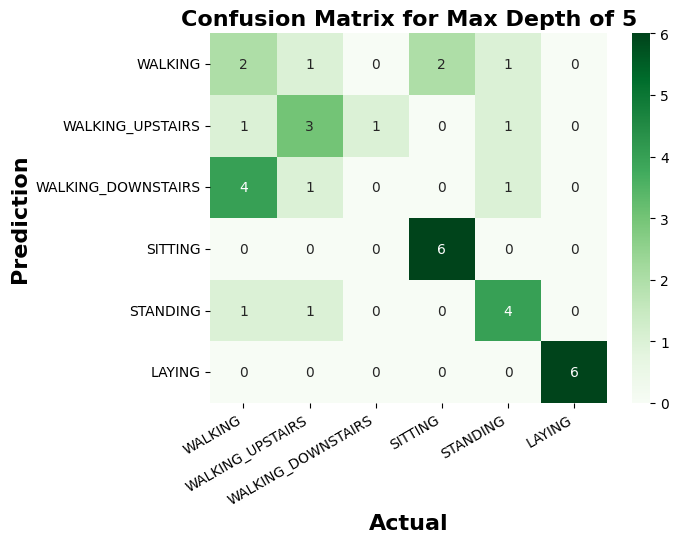

=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-==-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=


Depth = 6
Accuracy on test data 69.44444444444444 %


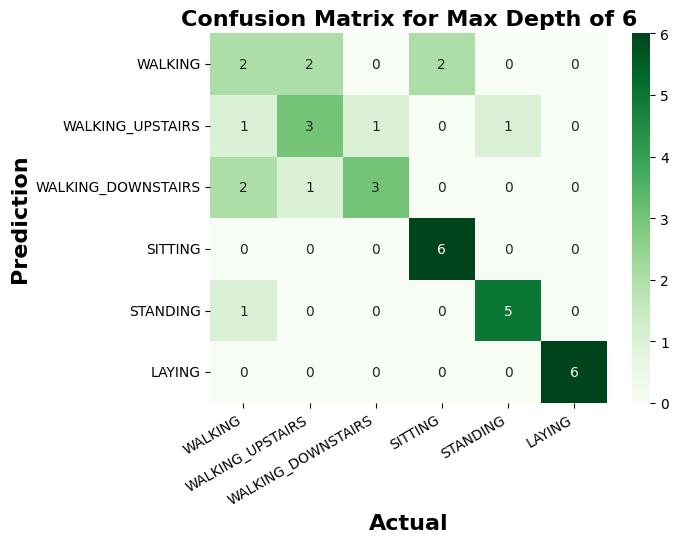

=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-==-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=


Depth = 7
Accuracy on test data 61.111111111111114 %


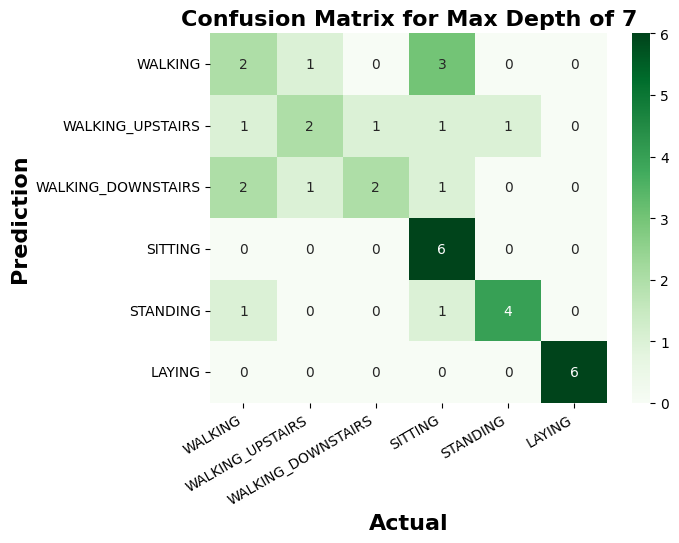

=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-==-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=


Depth = 8
Accuracy on test data 63.888888888888886 %


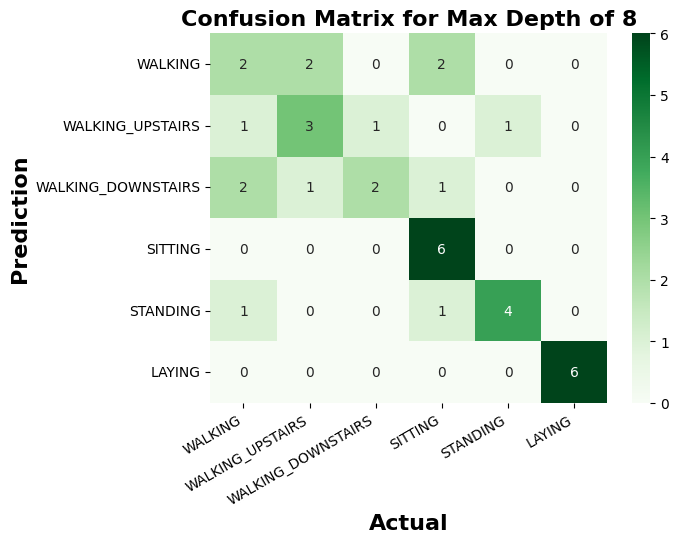

=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-==-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=




In [22]:
accuracy_list = []
for i in range(2,9):
    clf_i = DecisionTreeClassifier(max_depth=i,random_state=45)
    clf_i = clf_i.fit(X_train,y_train)

    y_pred = clf_i.predict(X_test)
    cm = confusion_matrix(y_test,y_pred)
    sns.heatmap(cm,annot=True,xticklabels=Movement,yticklabels=Movement,cmap="Greens")
    plt.ylabel("Prediction",fontweight='bold',fontsize = 16)
    plt.xlabel("Actual",fontweight='bold',fontsize = 16)
    plt.xticks(rotation=30, ha="right")
    plt.title(f"Confusion Matrix for Max Depth of {i}",fontweight='bold',fontsize = 16)
    print(f"Depth = {i}")
    print(f"Accuracy on test data",metrics.accuracy_score(y_test, y_pred)*100,"%")
    plt.show()
    accuracy_list.append(metrics.accuracy_score(y_test, y_pred))
    print("=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-==-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=")
    print("\n")

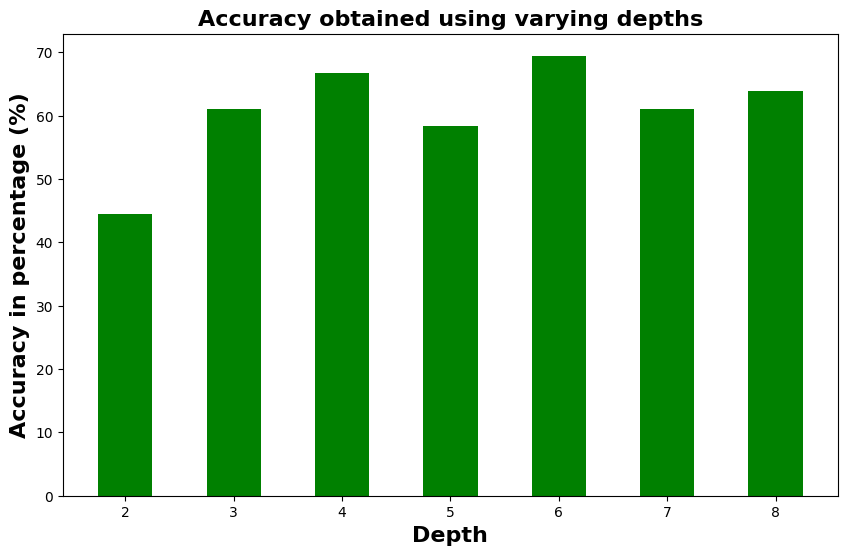

In [23]:
plt.figure(figsize=(10,6))
plt.bar(np.arange(2,9), tuple(map(lambda x: 100*x, accuracy_list)),0.5,color ="green",label  ="Accuracy Using Raw Data")
plt.xlabel("Depth",fontsize =16,fontweight ="bold")
plt.ylabel("Accuracy in percentage (%)",fontsize =16,fontweight ="bold")
plt.title("Accuracy obtained using varying depths",fontsize =16,fontweight ="bold")
plt.show()

**Observation**: With increasing depth, the accuracy increases intially but shows some minor fluctuations after *depth = 6* and settles around `62%`

---

**Task 5**<br>
Using PCA (Principal Component Analysis) on Total Acceleration (acc<sub>x</sub><sup>2</sup>+acc<sub>y</sub><sup>2</sup>+acc<sub>z</sub><sup>2</sup>) to compress the acceleration timeseries into two features and plotting a scatter plot to visualize different class of activities.<br>
Next, using TSFEL (a featurizer library) to create features and then perform PCA to obtain two features.

In [24]:
df

,accx,accy,accz,Label,Total_Acceration
0,0.973608,-0.184475,-0.282197,5.0,1.061579
1,0.976087,-0.186779,-0.284879,5.0,1.068788
2,0.977865,-0.191836,-0.289169,5.0,1.076640
3,0.979638,-0.191792,-0.291794,5.0,1.081619
4,0.982244,-0.189156,-0.288260,5.0,1.083677
...,...,...,...,...,...
53995,0.730058,-0.197915,-0.066743,2.0,0.576609
53996,0.696212,-0.149662,-0.059822,2.0,0.510688
53997,0.731536,-0.162198,-0.049890,2.0,0.563943
53998,0.762215,-0.176539,-0.038009,2.0,0.613582


In [25]:
from sklearn.decomposition import PCA

pca_dataframe = pd.DataFrame()
classes = {"WALKING":1,"WALKING_UPSTAIRS":2,"WALKING_DOWNSTAIRS":3,"SITTING":4,"STANDING":5,"LAYING":6}

for label in tuple(classes.values()):
    subset = df[df["Label"]==label]["Total_Acceration"].values.reshape(-1,500)
    pca = PCA(n_components=2)
    pca_result = pca.fit_transform(subset)
    pca_df = pd.DataFrame(data = pca_result,columns=["PCA1","PCA2"])
    pca_df["Label"] = label
    
    pca_dataframe = pd.concat([pca_dataframe,pca_df],ignore_index=True)
pca_dataframe

,PCA1,PCA2,Label
0,1.427494,0.124229,1
1,10.638311,-2.202530,1
2,-3.853082,5.173889,1
3,-2.867683,-0.230547,1
4,-6.365203,-6.377534,1
...,...,...,...
103,0.273226,-0.010475,6
104,0.185528,-0.057072,6
105,-0.141572,-0.013811,6
106,-0.358163,-0.010191,6


In [26]:
label_mapping = {1: "WALKING", 2: "WALKING_UPSTAIRS", 3: "WALKING_DOWNSTAIRS", 
                 4: "SITTING", 5: "STANDING", 6: "LAYING"}
pca_dataframe["Activity"] = pca_dataframe["Label"].map(label_mapping)
pca_dataframe

,PCA1,PCA2,Label,Activity
0,1.427494,0.124229,1,WALKING
1,10.638311,-2.202530,1,WALKING
2,-3.853082,5.173889,1,WALKING
3,-2.867683,-0.230547,1,WALKING
4,-6.365203,-6.377534,1,WALKING
...,...,...,...,...
103,0.273226,-0.010475,6,LAYING
104,0.185528,-0.057072,6,LAYING
105,-0.141572,-0.013811,6,LAYING
106,-0.358163,-0.010191,6,LAYING


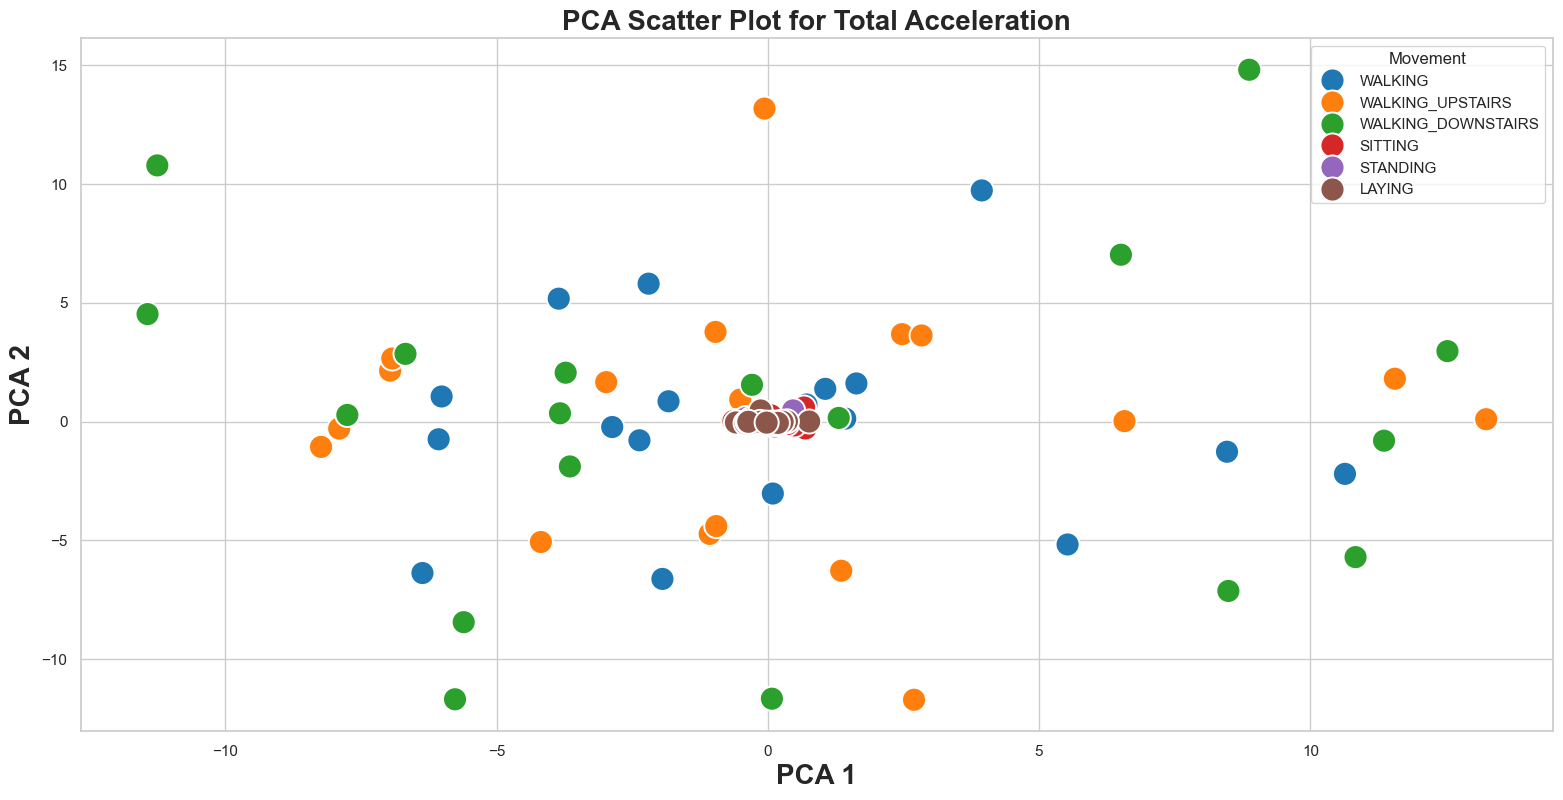

In [27]:
sns.set(style="whitegrid")
plt.figure(figsize = (19,9))
sns.scatterplot(x="PCA1",y="PCA2",hue ="Activity",data=pca_dataframe,s=300,palette="tab10")
plt.title("PCA Scatter Plot for Total Acceleration",fontweight='bold',fontsize=20)
plt.xlabel("PCA 1",fontweight='bold',fontsize=20)
plt.ylabel("PCA 2",fontweight='bold',fontsize=20)
plt.legend(title = "Movement")
plt.show()

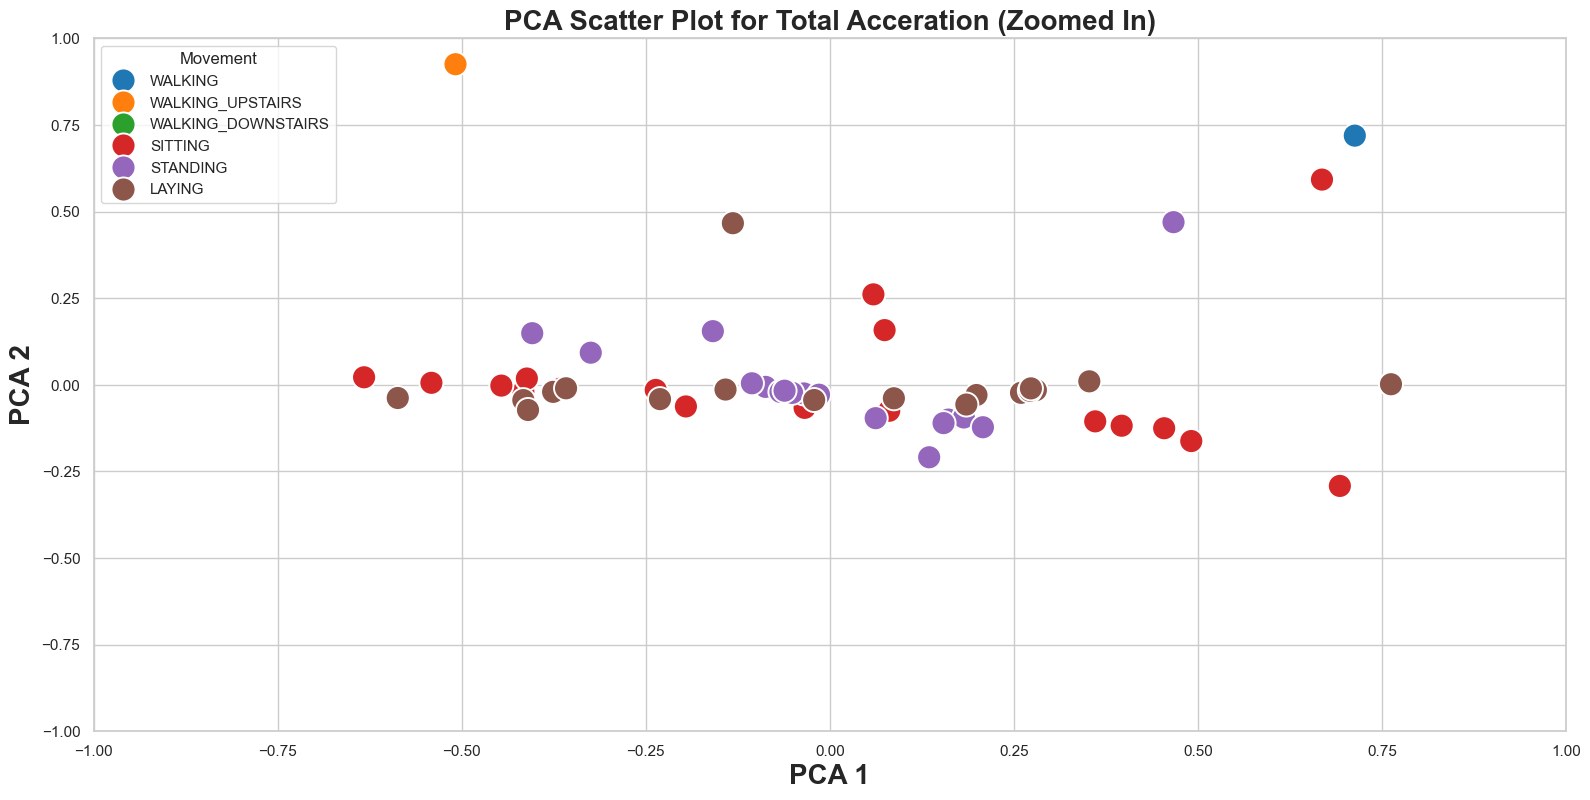

In [28]:
sns.set(style="whitegrid")
plt.figure(figsize = (19,9))
sns.scatterplot(x="PCA1",y="PCA2",hue ="Activity",data=pca_dataframe,s=300,palette="tab10")
plt.title("PCA Scatter Plot for Total Acceration (Zoomed In)",fontweight='bold',fontsize=20)
plt.xlabel("PCA 1",fontweight='bold',fontsize=20)
plt.ylabel("PCA 2",fontweight='bold',fontsize=20)
plt.xlim(-1,1)
plt.ylim(-1,1)
plt.legend(title = "Movement")
plt.show()

**Observation**: From the above scatter plots, it is clearly visible that the *static activities (standing, sitting and laying)* are grouped together near the **centre of the scatter plot**. Their variance is significantly lower as compared to the *dynamic activities (walking, walking upstairs and walking downstairs)* which have their data samples spread across the entire graph.

In [29]:
pip install tsfel

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [30]:
import tsfel
cfg_file = tsfel.get_features_by_domain()
X = tsfel.time_series_features_extractor(cfg_file,df[['accx','accy','accz']],window_size = 500)
X["Label"] = y_train
X

*** Feature extraction started ***


C:\Users\HP\AppData\Local\Temp\ipykernel_8904\2078998183.py:3: UserWarning: Using default sampling frequency set in configuration file.
  X = tsfel.time_series_features_extractor(cfg_file,df[['accx','accy','accz']],window_size = 500)



*** Feature extraction finished ***


,accx_Absolute energy,accx_Area under the curve,accx_Autocorrelation,accx_Average power,accx_Centroid,accx_ECDF Percentile Count_0,accx_ECDF Percentile Count_1,accx_ECDF Percentile_0,accx_ECDF Percentile_1,accx_ECDF_0,...,accz_Wavelet variance_1,accz_Wavelet variance_2,accz_Wavelet variance_3,accz_Wavelet variance_4,accz_Wavelet variance_5,accz_Wavelet variance_6,accz_Wavelet variance_7,accz_Wavelet variance_8,accz_Zero crossing rate,Label
0,478.627177,4.882182,478.627177,95.917270,2.494835,100.0,400.0,0.975656,0.980947,0.002,...,0.000487,0.001049,0.001795,0.002722,0.003826,0.005097,0.006514,0.008064,0.0,5
1,494.970128,4.964420,494.970128,99.192410,2.506701,100.0,400.0,0.989809,1.001942,0.002,...,0.000685,0.001450,0.002508,0.003628,0.004581,0.005440,0.006352,0.007356,0.0,5
2,430.187347,4.514342,430.187347,86.209889,2.457373,100.0,400.0,0.732451,1.062091,0.002,...,0.020702,0.042012,0.073398,0.119603,0.177105,0.233516,0.276743,0.303233,8.0,2
3,554.535503,5.049235,554.535503,111.129359,2.468648,100.0,400.0,0.752882,1.257718,0.002,...,0.012729,0.017934,0.020055,0.023226,0.028327,0.033735,0.038540,0.042890,16.0,3
4,12.580069,0.791164,12.580069,2.521056,2.508427,100.0,400.0,-0.162461,-0.154820,0.002,...,0.002056,0.004411,0.007652,0.011869,0.017017,0.023023,0.029825,0.037375,0.0,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103,543.448555,4.911136,543.448555,108.907526,2.530518,100.0,400.0,0.704972,1.349636,0.002,...,0.056817,0.088464,0.123827,0.160901,0.197897,0.220013,0.215158,0.187089,2.0,3
104,497.739114,4.877595,497.739114,99.747317,2.472182,100.0,400.0,0.784800,1.202131,0.002,...,0.034796,0.057884,0.100034,0.153607,0.202996,0.225477,0.211677,0.172606,10.0,1
105,515.531162,5.066863,515.531162,103.312858,2.496720,100.0,400.0,1.011890,1.019253,0.002,...,0.000253,0.000480,0.000774,0.001118,0.001487,0.001912,0.002436,0.003074,0.0,5
106,525.997480,4.991561,525.997480,105.410317,2.532697,100.0,400.0,0.824270,1.190775,0.002,...,0.013547,0.030818,0.055083,0.080357,0.103392,0.120844,0.128523,0.125302,16.0,2


In [31]:
pca = PCA(n_components=2)
pca_tsfel = pca.fit_transform(X.iloc[:,:-1])
pca_tsfel_dataframe   = pd.DataFrame(data = pca_tsfel,columns=["PCA_1","PCA_2"])
pca_tsfel_dataframe["Label"] = X["Label"]
pca_tsfel_dataframe

,PCA_1,PCA_2,Label
0,17800.317800,-22154.861470,5
1,14432.693653,-20104.958878,5
2,-22928.720041,34679.484176,2
3,-37576.823156,-8711.946396,3
4,62299.377515,27498.070170,6
...,...,...,...
103,-44311.320666,14711.261385,3
104,-8683.375292,331.749535,1
105,16034.786015,-30337.066243,5
106,-31208.192956,4962.752093,2


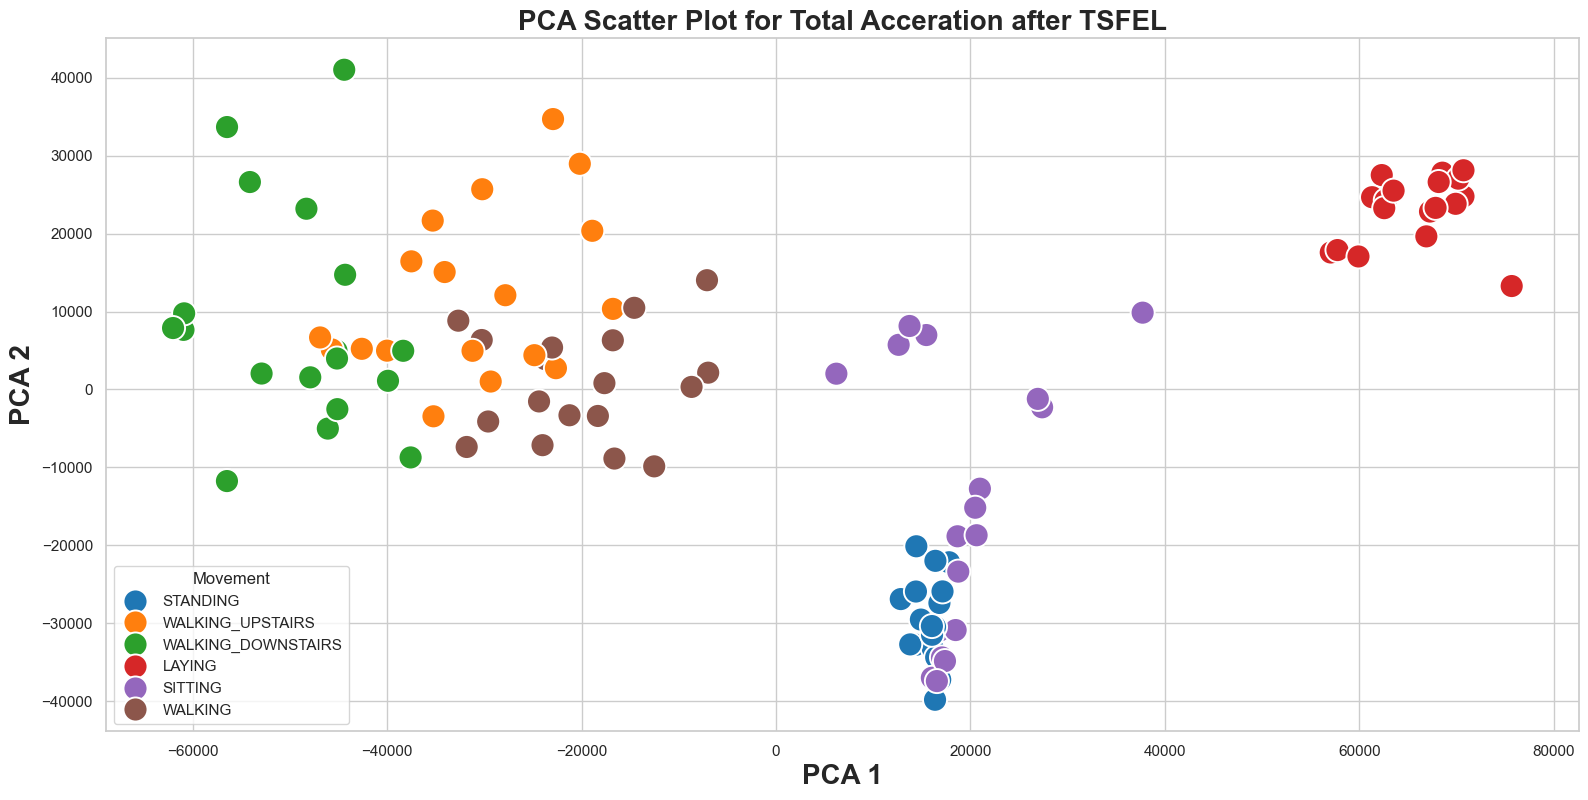

In [32]:
pca_tsfel_dataframe["Activity"] = pca_tsfel_dataframe["Label"].map(label_mapping)
sns.set(style="whitegrid")
plt.figure(figsize = (19,9))
sns.scatterplot(x="PCA_1",y="PCA_2",hue ="Activity",data=pca_tsfel_dataframe,s=300,palette="tab10")
plt.title("PCA Scatter Plot for Total Acceration after TSFEL",fontweight='bold',fontsize=20)
plt.xlabel("PCA 1",fontweight='bold',fontsize=20)
plt.ylabel("PCA 2",fontweight='bold',fontsize=20)
plt.legend(title = "Movement")
plt.show()

**Observation:** The scatter plot obtained by using the *TSFEL* library on the 3-axis accelerometer values is **significantly better** than the plot obtained by directly using PCA on *total linear acceleration*.

Not only are the static and dynamic activities distinguishable, individual activities have also been spaced out well.

---

**Task 6**<br>
Using the features obtained from TSFEL and training a Decision Tree. Report the accuracy and confusion matrix using test set. Observing that featurizing works better or worst than using the raw data. Train Decision Tree with varrying depths (2-8) and compare the accuracies obtained in Task 4 with the accuracies obtained using featured trainset.

*** Feature extraction started ***



*** Feature extraction finished ***
Accuracy on test data: 91.66666666666666 %


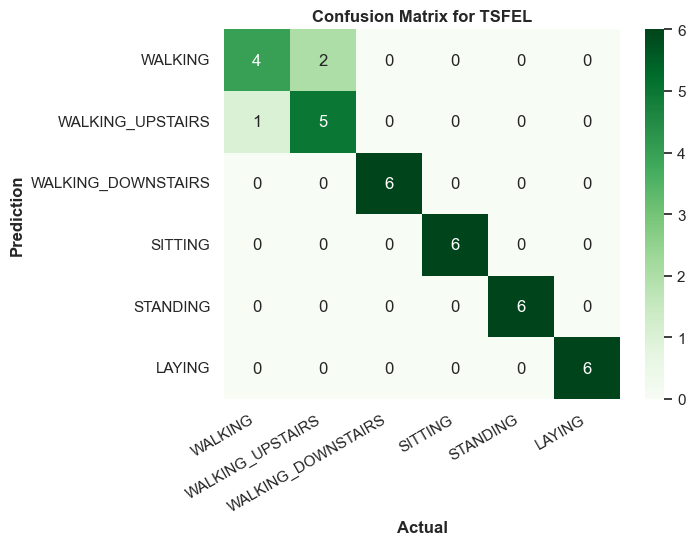

In [33]:
df_test = pd.DataFrame(np.concatenate((X_test.reshape((-1, 3)), np.repeat(y_test, 500).reshape(-1,1)), axis = 1), columns = ["accx", "accy", "accz", "Label"])
df_test

X_tsfel_test = tsfel.time_series_features_extractor(cfg_file,df_test[['accx','accy','accz']],window_size = 500,fs =50)
X_tsfel_test["Label"] = y_test
X_tsfel_test

tslef_dtc = DecisionTreeClassifier(random_state=500)
tslef_dtc = tslef_dtc.fit(X.iloc[:,:-1],X["Label"])

y_pred = tslef_dtc.predict(X_tsfel_test.iloc[:,:-1])
print("Accuracy on test data:",metrics.accuracy_score(y_test, y_pred)*100,"%")
cm = confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True,xticklabels=Movement,yticklabels=Movement,cmap="Greens")
plt.ylabel("Prediction",fontweight='bold')
plt.xlabel("Actual",fontweight='bold')
plt.xticks(rotation=30, ha="right")
plt.title("Confusion Matrix for TSFEL",fontweight='bold')
plt.show()

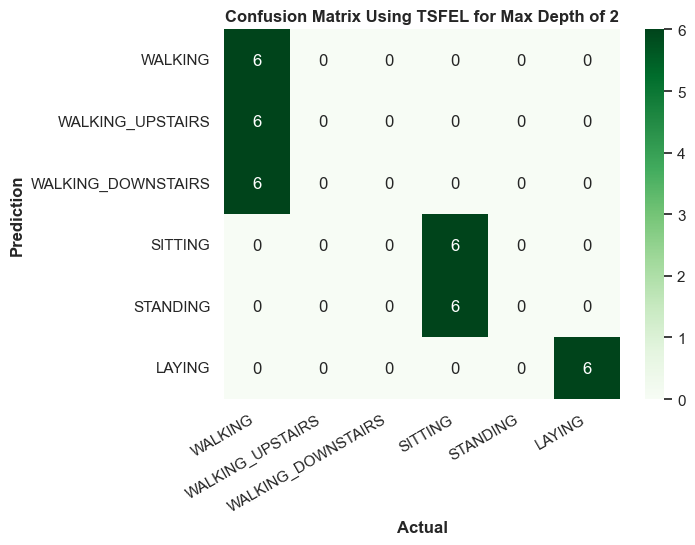

Accuracy for Max Depth 2 (Using tsfel) :  50.0 %
=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-==-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=

 



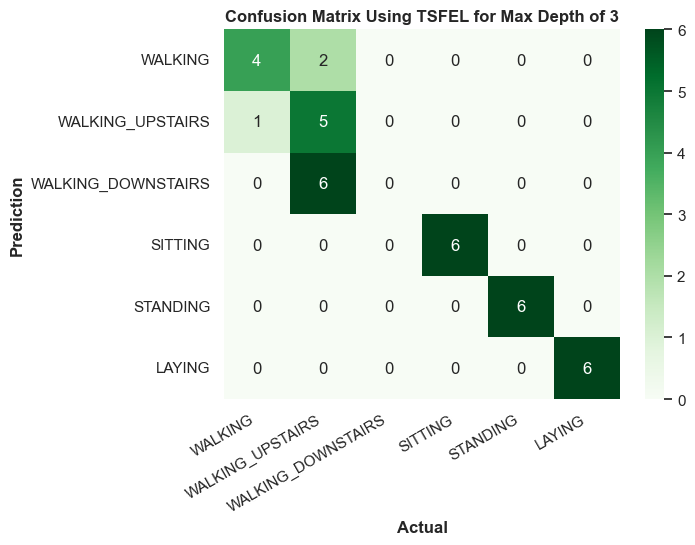

Accuracy for Max Depth 3 (Using tsfel) :  75.0 %
=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-==-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=

 



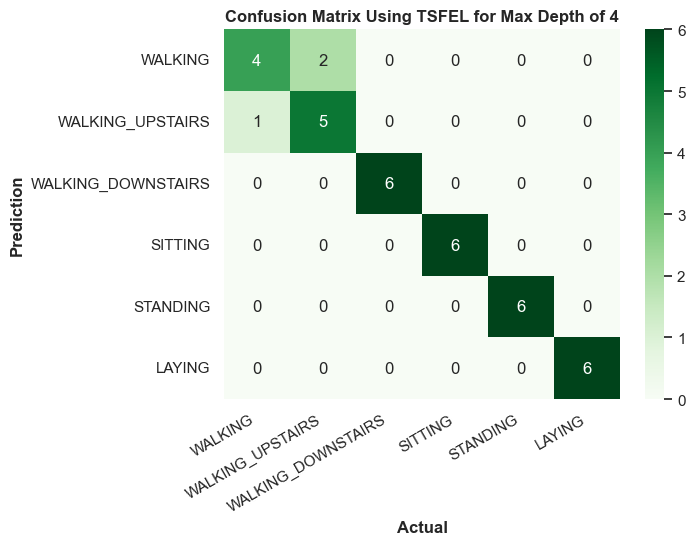

Accuracy for Max Depth 4 (Using tsfel) :  91.66666666666666 %
=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-==-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=

 



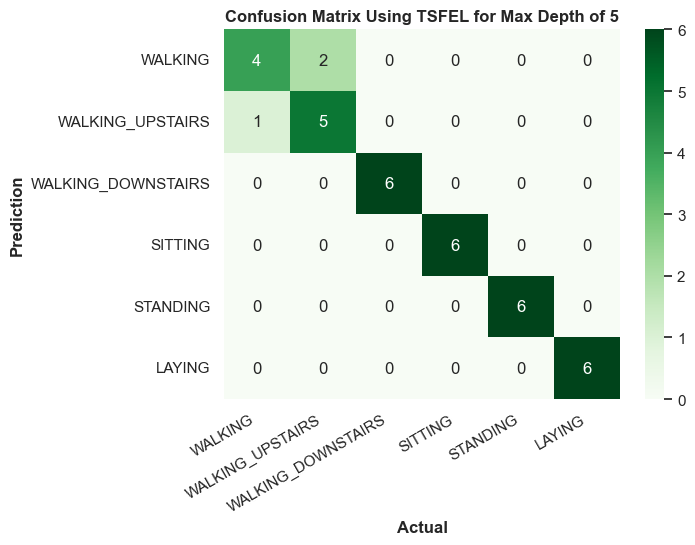

Accuracy for Max Depth 5 (Using tsfel) :  91.66666666666666 %
=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-==-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=

 



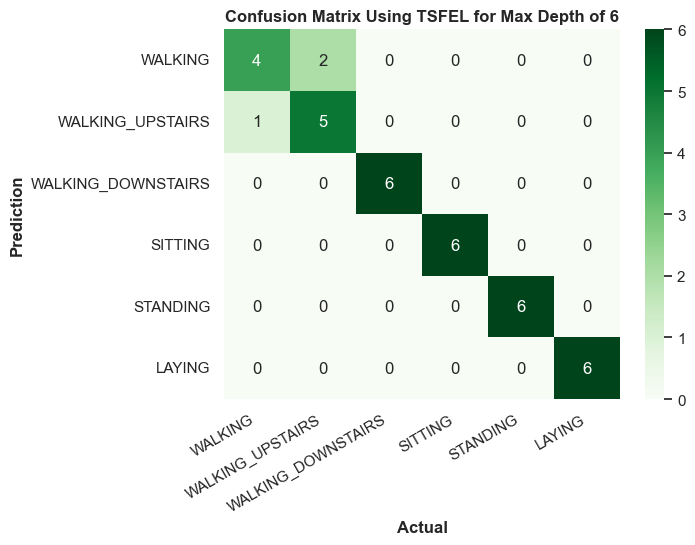

Accuracy for Max Depth 6 (Using tsfel) :  91.66666666666666 %
=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-==-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=

 



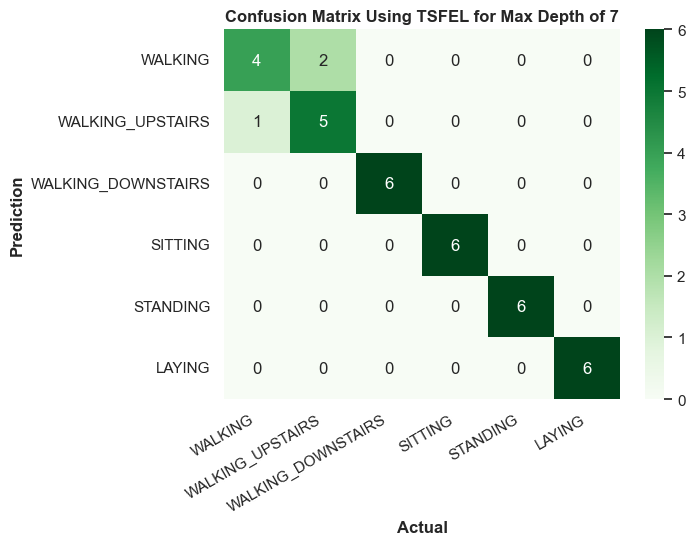

Accuracy for Max Depth 7 (Using tsfel) :  91.66666666666666 %
=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-==-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=

 



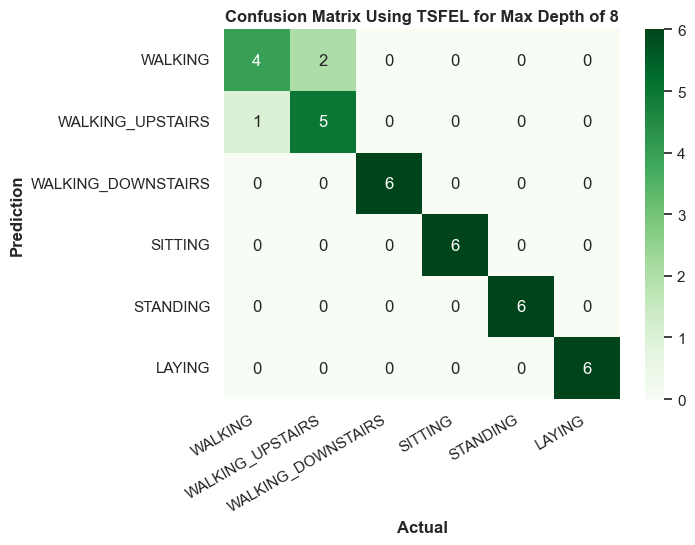

Accuracy for Max Depth 8 (Using tsfel) :  91.66666666666666 %
=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-==-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=

 



In [34]:
accuracy_list_tsfel = []
for i in range(2,9):
    tslef_dtc_i = DecisionTreeClassifier(max_depth=i,random_state=500)
    tslef_dtc_i = tslef_dtc_i.fit(X.iloc[:,:-1],X["Label"])

    y_pred = tslef_dtc_i.predict(X_tsfel_test.iloc[:,:-1])
    cm = confusion_matrix(y_test,y_pred)
    sns.heatmap(cm,annot=True,xticklabels=Movement,yticklabels=Movement,cmap="Greens")
    plt.ylabel("Prediction",fontweight='bold')
    plt.xlabel("Actual",fontweight='bold')
    plt.xticks(rotation=30, ha="right")
    plt.title(f"Confusion Matrix Using TSFEL for Max Depth of {i}",fontweight='bold')
    plt.show()
    print(f"Accuracy for Max Depth {i} (Using tsfel) : ",metrics.accuracy_score(y_test, y_pred)*100,"%")
    accuracy_list_tsfel.append(metrics.accuracy_score(y_test, y_pred))
    print("=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-==-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=")
    print("\n",'\n')

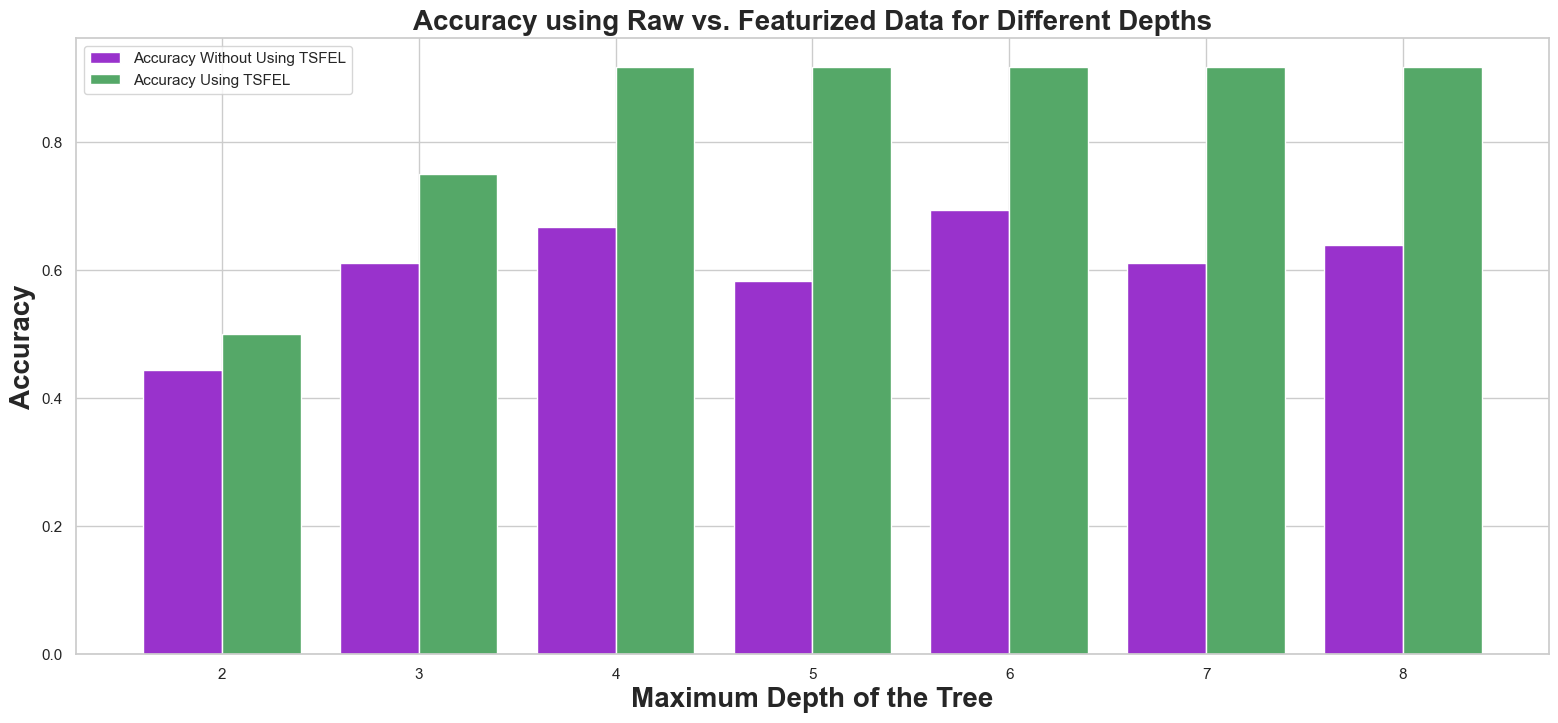

In [35]:
accuracy_len = np.arange(len(accuracy_list))
plt.figure(figsize=(19,8))
plt.bar(accuracy_len - 0.2,accuracy_list,0.4,label = "Accuracy Without Using TSFEL",color = "darkorchid")
plt.bar(accuracy_len + 0.2,accuracy_list_tsfel,0.4,label = "Accuracy Using TSFEL",color ="g")
plt.xticks(accuracy_len,np.arange(2,9))
plt.xlabel("Maximum Depth of the Tree",fontsize = 20,fontweight = "bold")
plt.ylabel("Accuracy",fontsize = 20,fontweight = "bold")
plt.title("Accuracy using Raw vs. Featurized Data for Different Depths",fontsize = 20,fontweight = "bold")
plt.legend()
plt.show()

From the above bar chart and the confusion matrices obtained, it is clear that accuracies obtained from the featurized data are far better than those obtained from raw data at **all depths**. In fact, the difference between the two accuracies seem to increase with increasing depths. Also, the accuracy obtained using *TSFEL* stagnates beyond a certain depth at `91.67%`.

---

**Some Observation**

On analysing the confusion matrix of the test data obtained by using featurised trainset, there is some overlap between walking and walking upstairs. Walking was incorrectly identified as walking upstairs `2 out of 6 times`. Likewise, walking upstairs was incorretly identified as walking `1 out of 6 times`.

Walking and walking upstairs are *both dynamic activies* which involve reasonable variations of all 3 axes of the accelerometer. This makes it difficult for the model to differentiate between the two activities with 100% accuracy. Moreover, it also possible that with more training data, the differences between them can be modelled better, thereby, improving the accuracy.